# Comparing Log files

Just want to check that DALEC log files which have been processed from a logfile which contains multiple logs are the same as the individually processed logs.

Using 21st June as our example data

In [1]:
import pandas as pd
import dalecLoad
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
tables = dalecLoad.multiLogLoad('data/21-jun-22/TESTLOG_20220622.dtf', dropNA=False)

In [3]:
log61 = dalecLoad.load_DALEC_log('data/21-jun-22/LOG_0061.dtf', dropNA=False)
log62 = dalecLoad.load_DALEC_log('data/21-jun-22/LOG_0062.dtf', dropNA=False)
log63 = dalecLoad.load_DALEC_log('data/21-jun-22/LOG_0063.dtf', dropNA=False)

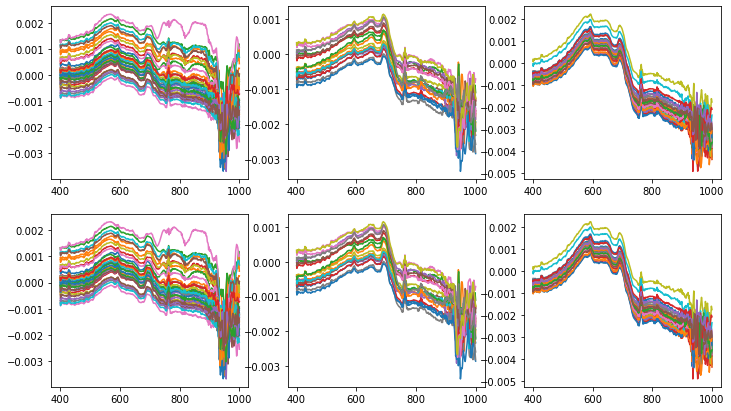

In [4]:
# and we find that we get exactly the same plots!
fig, ax = plt.subplots(2, 3, figsize=(12, 7))

spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/21-jun-22/TESTLOG_20220622.dtf')

logs = [log63, log62, log61]

for i in range(3):
    ind = list(tables.keys())[i]
    for sample in tables[ind].index.get_level_values('Sample #').unique():
        spectra = dalecLoad.uniform_grid_spectra_Rrs(tables[ind].loc[sample],
                                           spect_wavelengths)
        ax[0, i].plot(spectra['Wavelength'], (spectra['Rrs']))
    
    for sample in logs[i].index.get_level_values('Sample #').unique():
        spectra = dalecLoad.uniform_grid_spectra_Rrs(logs[i].loc[sample],
                                       spect_wavelengths)
        ax[1, i].plot(spectra['Wavelength'], (spectra['Rrs']))

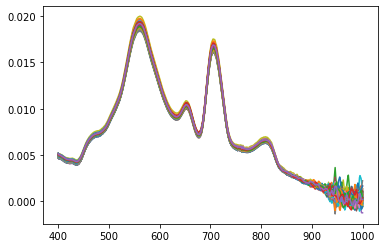

In [7]:
# just checking that my plotting code isn't weird
# so plot some older (nice) data from the 19th of May
# looks nice. therefore this plotting code is good.

log46 = dalecLoad.load_DALEC_log('data/LOG_0046.dtf')
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/LOG_0046.dtf')

for sample in log46.index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(log46.loc[sample],
                                   spect_wavelengths)
    plt.plot(spectra['Wavelength'], (spectra['Rrs']))

In [ ]:
list(indSat)

In [ ]:

if False:
    print('not empty')